# Task 3: Experience Analytics
  This notebook analyzes user experience metrics in the telecommunication industry, focusing on:
    - Network parameters (TCP retransmission, RTT, Throughput)
    - Device characteristics (Handset type)
    
    1. Data aggregation and cleaning
    2. Statistical analysis of metrics
    3. Distribution analysis by handset type
    4. User experience clustering

In [2]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from database import get_db_connection
from experience_analytics import *

## 1. Data Collection and Aggregation"

In [3]:
# Get database connection
conn = get_db_connection()

# Fetch experience metrics
raw_data = get_experience_metrics(conn)
print(f"Raw data shape: {raw_data.shape}")
print("\nSample of raw data:")
raw_data.head()

c:\Users\hp\Documents\telleco_week2\notebooks\../src\experience_analytics.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Raw data shape: (50464, 6)

Sample of raw data:


,msisdn,tcp_retransmission,avg_rtt,Handset Type,avg_throughput,Bearer Id
0,3.365922e+10,3238627.0,52.0,Samsung Galaxy Note 8 (Sm-N950F Ds),3190.0,1.304243e+19
1,3.366447e+10,6034635.0,110.5,Huawei B593S-22,17402.5,1.311448e+19
2,3.365922e+10,32789164.0,41.5,Samsung Galaxy Note 8 (Sm-N950F Ds),4344.0,1.304243e+19
3,3.375376e+10,13847122.0,36.0,Samsung Galaxy J3 (Sm-J330),441.5,7.277826e+18
4,3.365875e+10,9865591.0,226.0,Huawei E5180,20029.0,1.304243e+19


In [4]:
# Aggregate metrics per customer
agg_data = aggregate_customer_experience(raw_data)
print(f"Aggregated data shape: {agg_data.shape}")
print("\nSample of aggregated data:")
agg_data.head()

c:\Users\hp\Documents\telleco_week2\notebooks\../src\experience_analytics.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)
c:\Users\hp\Documents\telleco_week2\notebooks\../src\experience_analytics.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Aggregated data shape: (39284, 5)

Sample of aggregated data:


,msisdn,avg_tcp_retransmission,avg_rtt,handset_type,avg_throughput
0,3.360101e+10,9370832.0,45.50,Apple iPhone Se (A1723),28390.5
1,3.360101e+10,110232.0,19.50,Huawei Mate 10 Pro Porsche Design Huawei Mate 10,21208.0
2,3.360102e+10,13793715.5,80.00,Apple iPhone 7 Plus (A1784),9628.0
3,3.360103e+10,2325497.0,30.00,Apple iPhone 8 Plus (A1897),19095.0
4,3.360103e+10,2006261.0,143.25,Apple iPhone 7 (A1778),4269.5


## 2. Statistical Analysis of Metrics

In [5]:
# Basic statistics of the metrics
print("Basic Statistics of Experience Metrics:")
metrics = ['tcp_retransmission', 'avg_rtt', 'avg_throughput']
raw_data[metrics].describe()

Basic Statistics of Experience Metrics:


,tcp_retransmission,avg_rtt,avg_throughput
count,5.046400e+04,50464.000000,50464.000000
mean,3.755212e+06,58.979679,19285.476304
std,4.909812e+06,39.041032,14240.555958
min,8.600000e+01,9.500000,19.000000
25%,1.610230e+05,29.500000,8195.875000
50%,1.187642e+06,45.500000,16778.250000
75%,5.614100e+06,75.000000,27484.750000
max,1.379372e+07,143.250000,56418.062500


In [6]:
# Analyze TCP retransmission values
tcp_stats = get_metric_statistics(raw_data, 'tcp_retransmission')
print("TCP Retransmission Statistics:")
print(f"Top 10 values: {tcp_stats['top_values']}")
print(f"Bottom 10 values: {tcp_stats['bottom_values']}")
print(f"Most frequent values: {tcp_stats['most_frequent']}")

TCP Retransmission Statistics:
Top 10 values: [13793715.5, 13793715.5, 13793715.5, 13793715.5, 13793715.5, 13793715.5, 13793715.5, 13793715.5, 13793715.5, 13793715.5]
Bottom 10 values: [86.0, 97.0, 106.0, 108.0, 113.0, 128.0, 129.0, 134.0, 134.0, 143.0]
Most frequent values: [13793715.5, 2660.0, 5320.0, 6650.0, 3990.0, 7980.0, 1873.0, 2648.0, 15960.0, 10640.0]


In [7]:
# Analyze RTT values
rtt_stats = get_metric_statistics(raw_data, 'avg_rtt')
print("\nRTT Statistics:")
print(f"Top 10 values: {rtt_stats['top_values']}")
print(f"Bottom 10 values: {rtt_stats['bottom_values']}")
print(f"Most frequent values: {rtt_stats['most_frequent']}")


RTT Statistics:
Top 10 values: [143.25, 143.25, 143.25, 143.25, 143.25, 143.25, 143.25, 143.25, 143.25, 143.25]
Bottom 10 values: [9.5, 9.5, 10.0, 10.0, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5]
Most frequent values: [143.25, 24.5, 24.0, 23.0, 27.5, 22.0, 26.0, 23.5, 25.0, 26.5]


In [8]:
# Analyze Throughput values
throughput_stats = get_metric_statistics(raw_data, 'avg_throughput')
print("\nThroughput Statistics:")
print(f"Top 10 values: {throughput_stats['top_values']}")
print(f"Bottom 10 values: {throughput_stats['bottom_values']}")
print(f"Most frequent values: {throughput_stats['most_frequent']}")


Throughput Statistics:
Top 10 values: [56418.0625, 56418.0625, 56418.0625, 56418.0625, 56418.0625, 56418.0625, 56418.0625, 56418.0625, 56418.0625, 56418.0625]
Bottom 10 values: [19.0, 26.0, 26.5, 26.5, 28.5, 28.5, 28.5, 29.0, 29.5, 30.0]
Most frequent values: [56418.0625, 61.5, 178.0, 261.0, 332.5, 230.0, 127.5, 181.0, 297.0, 250.5]


## 3. Analysis by Handset Type

In [9]:
# Count of different handset types
handset_counts = raw_data['Handset Type'].value_counts()
print("Number of sessions per handset type:")
handset_counts.head(10)

Number of sessions per handset type:


Handset Type
Huawei B528S-23A                17256
undefined                        2259
Apple iPhone 6 (A1586)           1870
Huawei E5180                     1745
Apple iPhone 6S (A1688)          1577
Apple iPhone 7 (A1778)           1507
Samsung Galaxy S8 (Sm-G950F)     1311
Apple iPhone 8 (A1905)            976
Apple iPhone Xr (A2105)           935
Apple iPhone X (A1901)            881
Name: count, dtype: int64

In [10]:
# Analyze throughput distribution by handset type
throughput_by_handset = analyze_throughput_by_handset(agg_data)
print("Throughput Statistics by Handset Type:")
throughput_by_handset

Throughput Statistics by Handset Type:


,mean,median,std,count
handset_type,,,,
A-Link Telecom I. Cubot Note Plus,3349.5,3349.50,NaN,1
A-Link Telecom I. Cubot Note S,4468.5,4468.50,NaN,1
A-Link Telecom I. Cubot Nova,28108.5,28108.50,NaN,1
A-Link Telecom I. Cubot Power,34734.0,34734.00,NaN,1
A-Link Telecom I. Cubot R9,2019.5,2019.50,NaN,1
...,...,...,...,...
Zte Mf626,3048.0,3048.00,NaN,1
Zte Racer Iii Mini Zte Switch X1 Bouygues Telecom Bs 402 Blade Q Mini Zte Blade G Pro,1817.0,1817.00,2161.63,2
Zyxel Communicat. Lte7460,30978.0,30978.00,NaN,1


In [11]:
# Analyze TCP retransmission by handset type
tcp_by_handset = analyze_tcp_by_handset(agg_data)
print("\nTCP Retransmission Statistics by Handset Type:")
tcp_by_handset


TCP Retransmission Statistics by Handset Type:


,mean,median,std,count
handset_type,,,,
A-Link Telecom I. Cubot Note Plus,616213.00,616213.0,NaN,1
A-Link Telecom I. Cubot Note S,13793715.50,13793715.5,NaN,1
A-Link Telecom I. Cubot Nova,137170.00,137170.0,NaN,1
A-Link Telecom I. Cubot Power,8041.00,8041.0,NaN,1
A-Link Telecom I. Cubot R9,30999.00,30999.0,NaN,1
...,...,...,...,...
Zte Mf626,4852921.00,4852921.0,NaN,1
Zte Racer Iii Mini Zte Switch X1 Bouygues Telecom Bs 402 Blade Q Mini Zte Blade G Pro,22924.00,22924.0,4205.87,2
Zyxel Communicat. Lte7460,13793715.50,13793715.5,NaN,1


C:\Users\hp\AppData\Local\Temp\ipykernel_10284\161044398.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


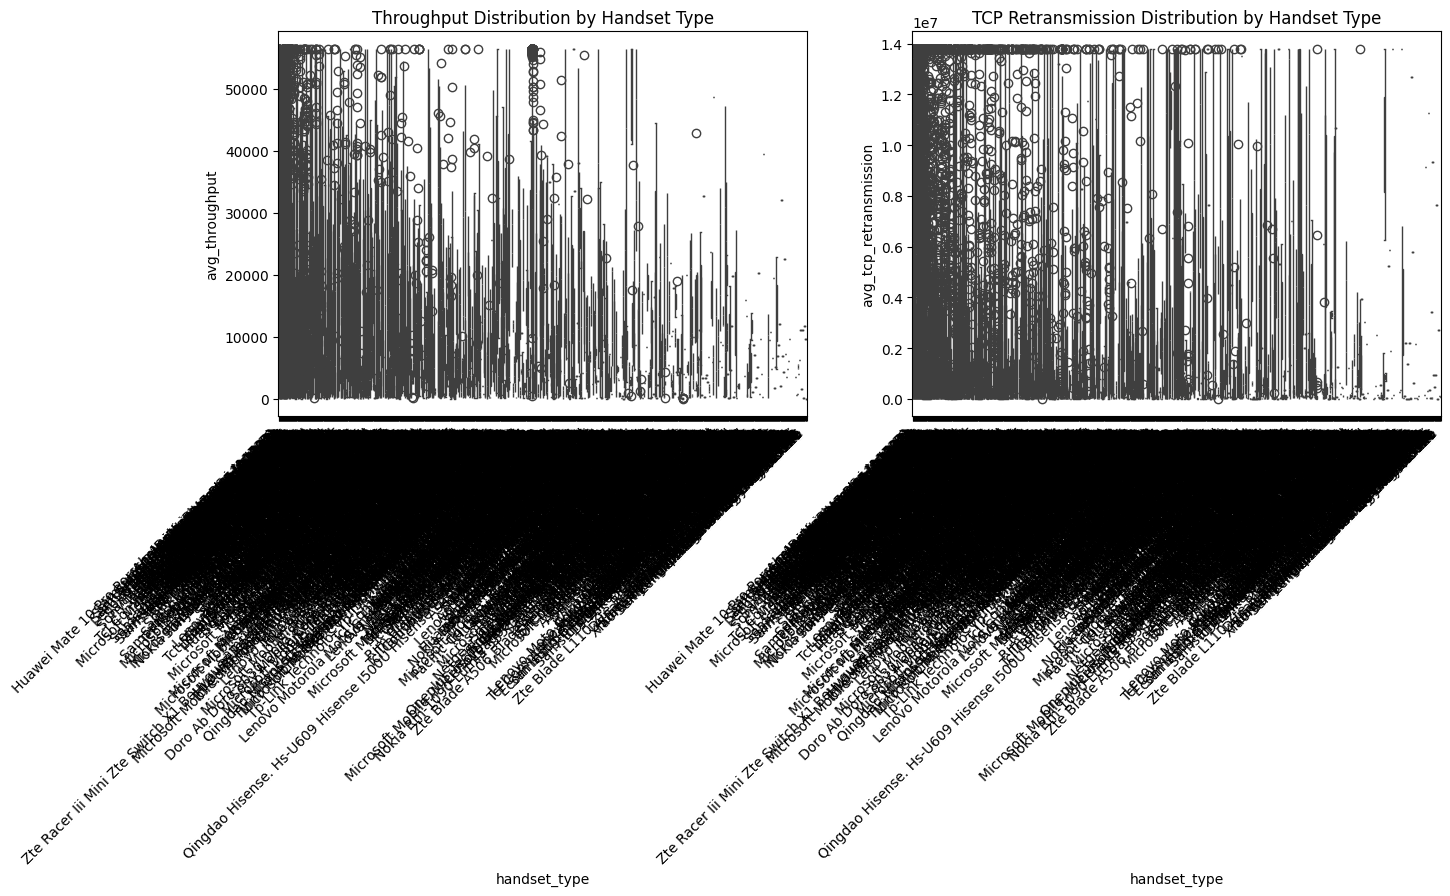

In [12]:
# Visualize distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=agg_data, x='handset_type', y='avg_throughput')
plt.xticks(rotation=45, ha='right')
plt.title('Throughput Distribution by Handset Type')

plt.subplot(1, 2, 2)
sns.boxplot(data=agg_data, x='handset_type', y='avg_tcp_retransmission')
plt.xticks(rotation=45, ha='right')
plt.title('TCP Retransmission Distribution by Handset Type')

plt.tight_layout()
plt.show()

## 4. User Experience Clustering

In [13]:
# Perform k-means clustering
clustered_data, cluster_stats, kmeans = perform_experience_clustering(agg_data)

print("Cluster Statistics:")
cluster_stats

Cluster Statistics:


avg_tcp_retransmission             avg_rtt         \
                                     mean         std    mean    std   
experience_cluster                                                     
0                             11682547.94  2669056.63   67.16  35.03   
1                              1164033.23  1574034.53   35.90  15.59   
2                              1826584.97  2399034.23  121.94  25.08   

                   avg_throughput            
                             mean       std  
experience_cluster                           
0                        24917.00  14686.29  
1                        20049.61  13828.95  
2                         6972.32   7253.38

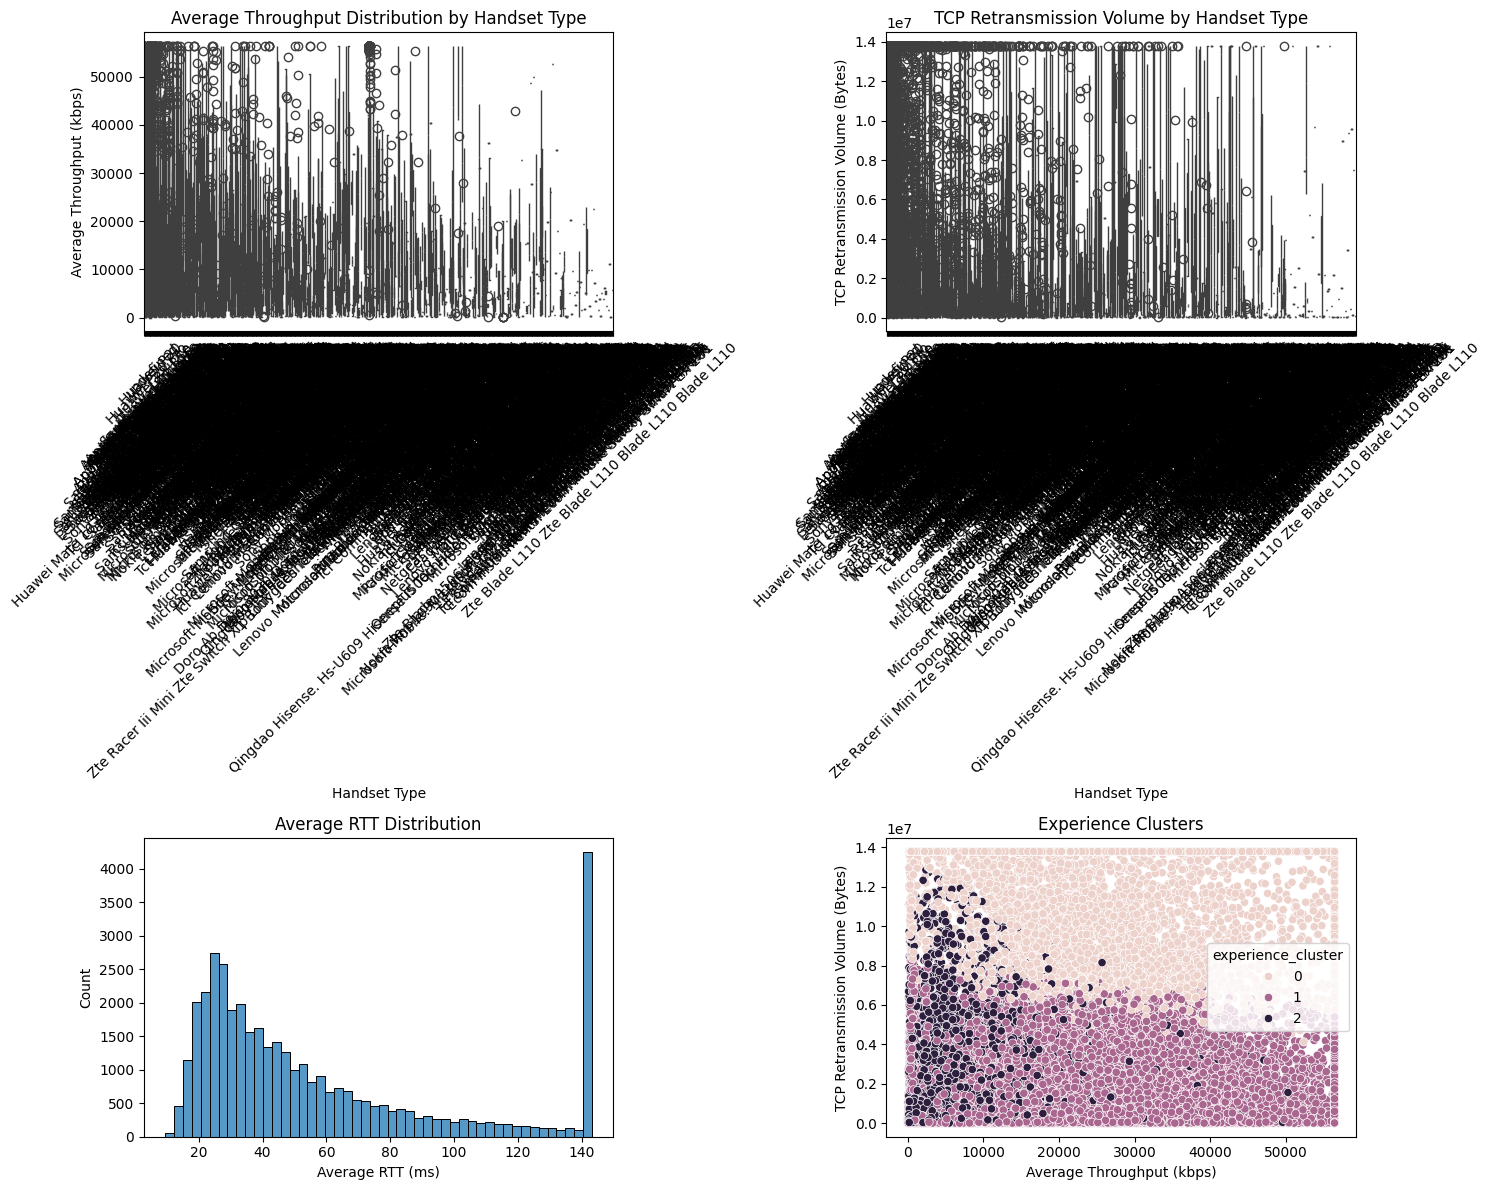

In [14]:
# Visualize clusters
fig = plot_experience_distributions(clustered_data)
plt.show()

In [15]:
# Distribution of handset types in each cluster
cluster_handset_dist = pd.crosstab(clustered_data['experience_cluster'], 
                                    clustered_data['handset_type'])
print("Distribution of handset types across clusters:")
cluster_handset_dist

Distribution of handset types across clusters:


handset_type,A-Link Telecom I. Cubot Note Plus,A-Link Telecom I. Cubot Note S,A-Link Telecom I. Cubot Nova,A-Link Telecom I. Cubot Power,A-Link Telecom I. Cubot R9,A-Link Telecom I. Cubot X18 Plus,Acer Liquid Z220,Acer Liquid Z630,Acer Liquid Zest 4G,Acer Liquid Zest Plus,...,Zte Blade L110 Zte Blade L110 Blade L110 Blade L110,Zte Blade V7 Lite Blade V6 Plus Zte Blitz,Zte Blade V8 Lite Blade V8 Lite Zte Blade V8 Se,Zte Mf190,Zte Mf259,Zte Mf626,Zte Racer Iii Mini Zte Switch X1 Bouygues Telecom Bs 402 Blade Q Mini Zte Blade G Pro,Zyxel Communicat. Lte7460,Zyxel Communicat. Sbg3600,undefined
experience_cluster,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,178
1,0,0,1,1,0,1,0,0,1,0,...,0,2,0,0,15,0,0,0,0,1256
2,1,0,0,0,1,0,1,1,0,1,...,1,0,1,1,13,1,2,0,0,274
